# <font color=darkblue> Machine Learning model deployment with Flask framework</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with the help of the flask framework.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import pickle


### 2. Load the dataset

In [4]:
df=pd.read_csv('car+data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [5]:
df.shape


(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [7]:
df[df.duplicated()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

### 5. Drop the columns which you think redundant for the analysis.

In [10]:
df= df.drop(columns='Car_Name', axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [11]:
df[ 'age_of_the_car']=2024-df['Year']
df= df.drop(columns='Year' , axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


### 7. Encode the categorical columns

In [12]:
df1=df.copy()


In [13]:
df1=pd.get_dummies(df1,columns=['Fuel_Type','Seller_Type','Transmission'])

In [14]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_the_car,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,11,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,7,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,13,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,10,0,1,0,1,0,0,1


In [15]:
#Mannual encoding
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [16]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [17]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df['Fuel_Type']=df['Fuel_Type'].replace({'Petrol':0, 'Diesel':1, 'CNG':2})
df['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [19]:
df['Seller_Type']=df['Seller_Type'].replace({'Dealer':0, 'Individual':1})
df['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [20]:
df['Transmission']=df['Transmission'].replace({'Manual':0, 'Automatic':1})
df['Transmission'].unique()

array([0, 1], dtype=int64)

### 8. Separate the target and independent features.

In [21]:
X=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

### 9. Split the data into train and test.

In [22]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(209, 7) (90, 7)
(209,) (90,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [23]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

r2_train= r2_score(y_train, y_train_pred)
r2_test= r2_score(y_test, y_test_pred)

print(r2_train)
print(r2_test)

0.9767317831321674
0.8998261518529774


### 11. Create a pickle file with an extension as .pkl

In [25]:
import pickle
pickle.dump(rf, open('model1.pkl','wb'))

model=pickle.load(open('model1.pkl','rb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Used Car Selling Price Prediction</title>
</head>

<body>

    <div class="hero-image">
      <div class="hero-text">

        <h1 style="font-size:50px">Used Car Price Predictor</h1>
         <br><br><h3>{{ prediction_text }}<h3>
      </div>
    </div>

     <style>

        body, html {
          height: 100%;
          margin: 0;
          font-family: Arial, Helvetica, sans-serif;
        }

        .hero-image {
          background-image: linear-gradient(rgba(0, 0, 0, 0.5), rgba(0, 0, 0, 0.5)), url('/static/bg_image.jpg');
          height: 50%;
          background-position: bottom;
          background-repeat: no-repeat;
          background-size: cover;
          position: relative;
        }

        .hero-text {
          text-align: center;
          position: absolute;
          top: 50%;
          left: 50%;
          transform: translate(-50%, -50%);
          color: white;
        }

    </style>


    <div style="color:	rgb(0, 0, 0)">
        <form action="{{ url_for('predict')}}" method="post">
            <h2>Enter Car Details: </h2>
            <h3>Age of the car(In years)</h3>
            <input id="first" name="Age_of_the_car" type="number ">
            <h3>Present Showroom Price(In lakhs)</h3><br><input id="second" name="Present_Price" required="required">
            <h3>Kilometers Driven</h3><input id="third" name="Kms_Driven" required="required">
            <h3>Owner Type (0/1/3)</h3><br><input id="fourth" name="Owner" required="required">
            <h3>Fuel type</h3><br><select name="Fuel_Type" id="fuel" required="required">
                <option value="0">Petrol</option>
                <option value="1">Diesel</option>
                <option value="2">CNG</option>
            </select>
            <h3>Seller Type</h3><br><select name="Seller_Type" id="resea" required="required">
                <option value="0">Dealer</option>
                <option value="1">Individual</option>
            </select>
            <h3>Transmission type</h3><br><select name="Transmission" id="research" required="required">
                <option value="0">Manual Car</option>
                <option value="1">Automatic Car</option>
            </select>
            <br><br><button id="sub" type="submit ">Predict Selling Price</button>
            <br>


        </form>

    </div>

    <style>
	body {
            background-color: 101, 10, 20;
            text-align: center;
            padding: 0px;
	    font-family: Helvetica;
        }

        #research {
            font-size: 18px;
            width: 200px;
            height: 23px;
            top: 23px;
        }

        #box {
            border-radius: 60px;
            border-color: 45px;
            border-style: solid;
            text-align: center;
            background-color: white;
            font-size: medium;
            position: absolute;
            width: 700px;
            bottom: 9%;
            height: 850px;
            right: 30%;
            padding: 0px;
            margin: 0px;
            font-size: 14px;
        }

        #fuel {
            width: 83px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 20px;
        }

        #fuel:hover {
            background-color: white;
        }

        #research {
            width: 150px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }

        #research:hover {
            background-color: white;
        }

        #resea {
            width: 99px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }

        #resea:hover {
            background-color: white;
        }

        #sub {
            background-color: Green;
            font-family:'Helvetica' monospace;
            font-weight: bold;
            width: 180px;
            height: 60px;
            text-align: center;
            border-radius: 20px;
            font-size: 18px;
            color: white;
        }

        #sub:hover {
            background-color: white;
        }

        #first {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #second {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #third {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #fourth {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }
    </style>
</body>

</html>

### b) Create app.py file and write the predict function

In [ ]:
from flask import Flask, render_template, jsonify,  request
import pickle as pkl
import numpy as np
import sklearn


model = pkl.load(open('model.pkl', 'rb'))

app = Flask(__name__ ,template_folder='template')

@app.route('/',methods=["GET"])
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == "POST":
       
        Age_of_the_car = (request.form['Age_of_the_car'])
        Present_Price = float(request.form['Present_Price'])
        Kms_Driven = int(request.form['Kms_Driven'])
        Owner = int(request.form['Owner'])
        Fuel_Type = (request.form['Fuel_Type'])
        Seller_Type = (request.form['Seller_Type'])
        Transmission = (request.form['Transmission'])
    
    
    prediction = model.predict([[ Age_of_the_car,Present_Price, Kms_Driven, Owner,Fuel_Type, Seller_Type, Transmission]])
    output=round(prediction[0],2)
    
   
    return render_template('index.html', prediction_text='Predicted Selling Price: {:.2f} lakhs'.format(output))

if __name__ == "__main__":
    app.run(debug=True)

### 13. Run the app.py python file which will render to index html page then enter the input values and get the prediction.

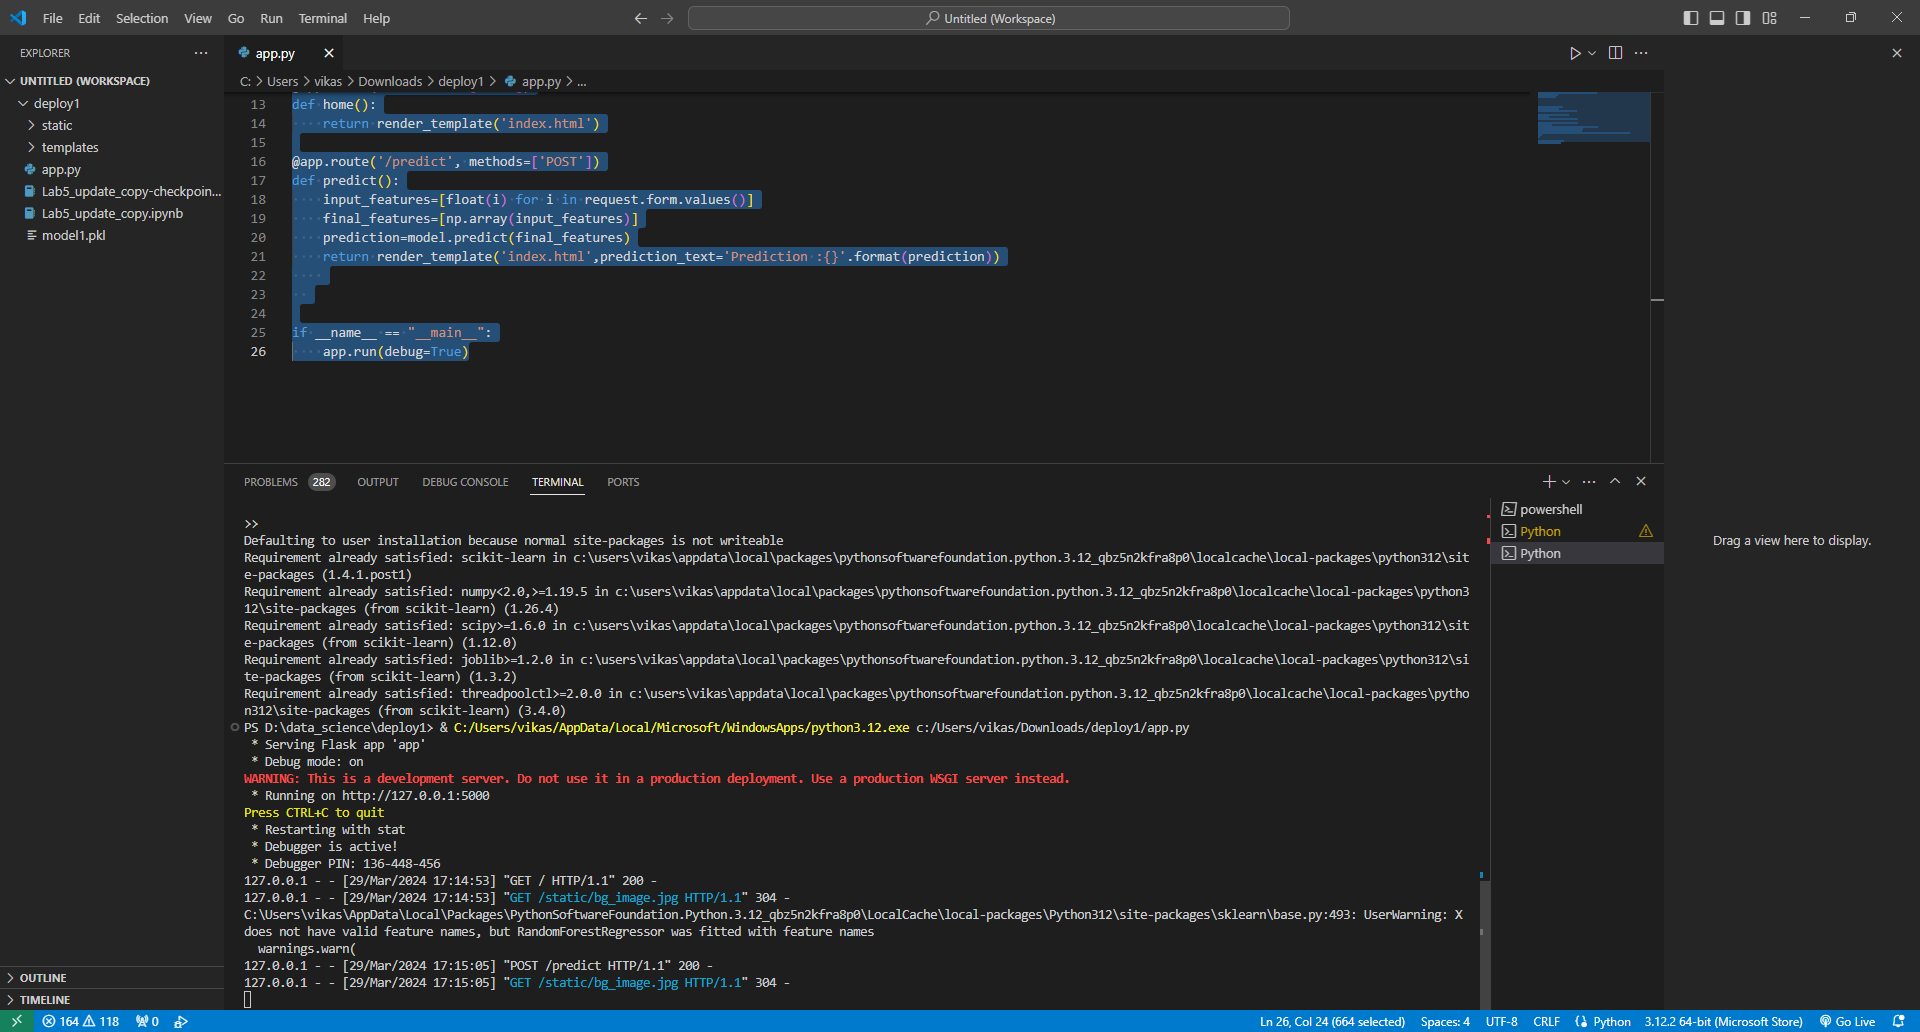

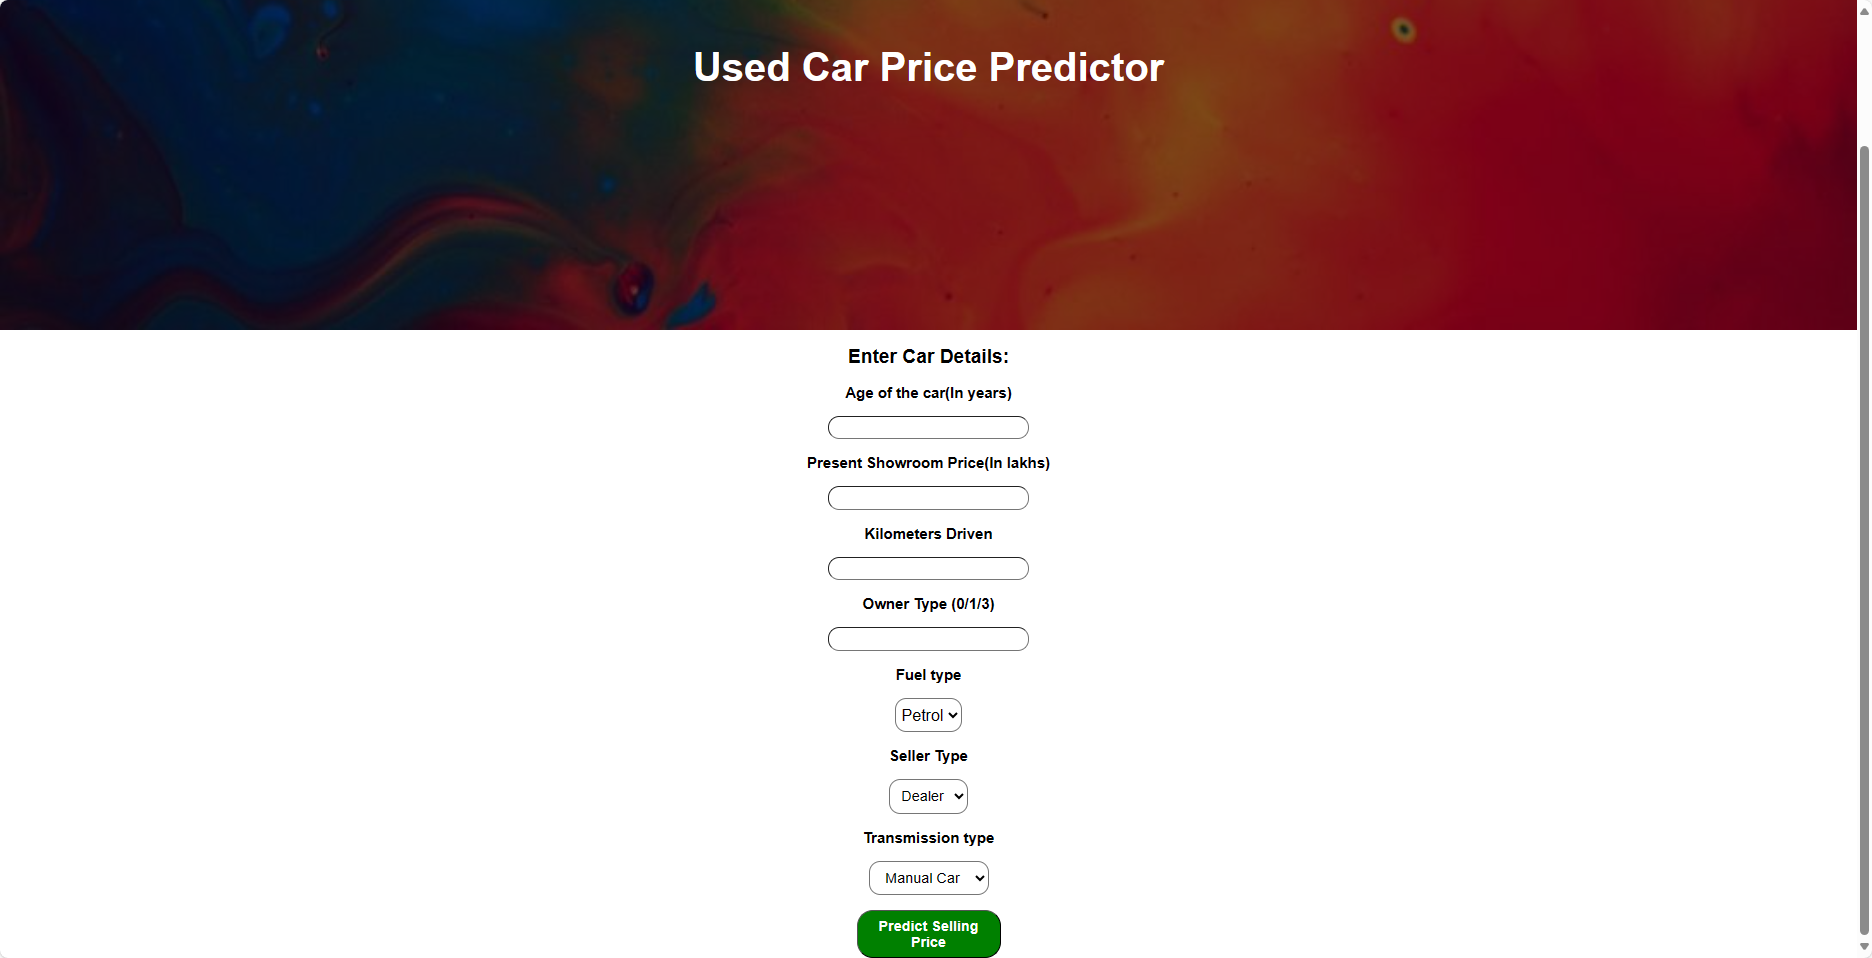

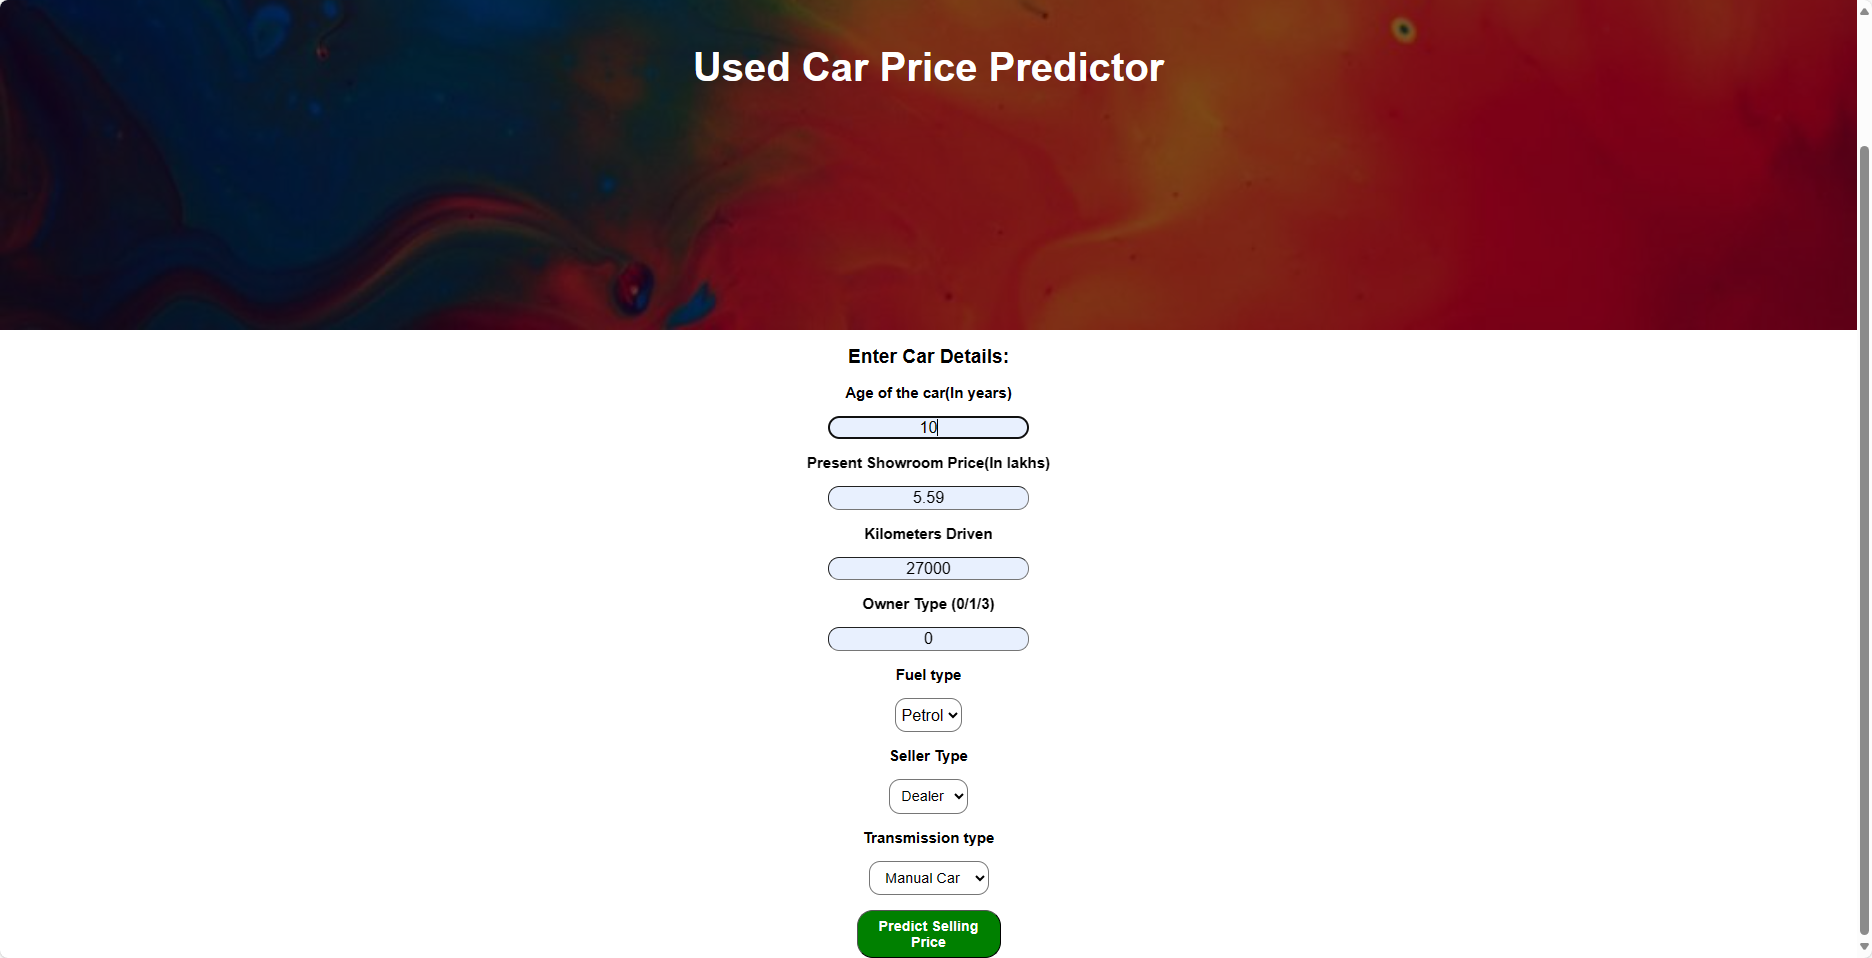

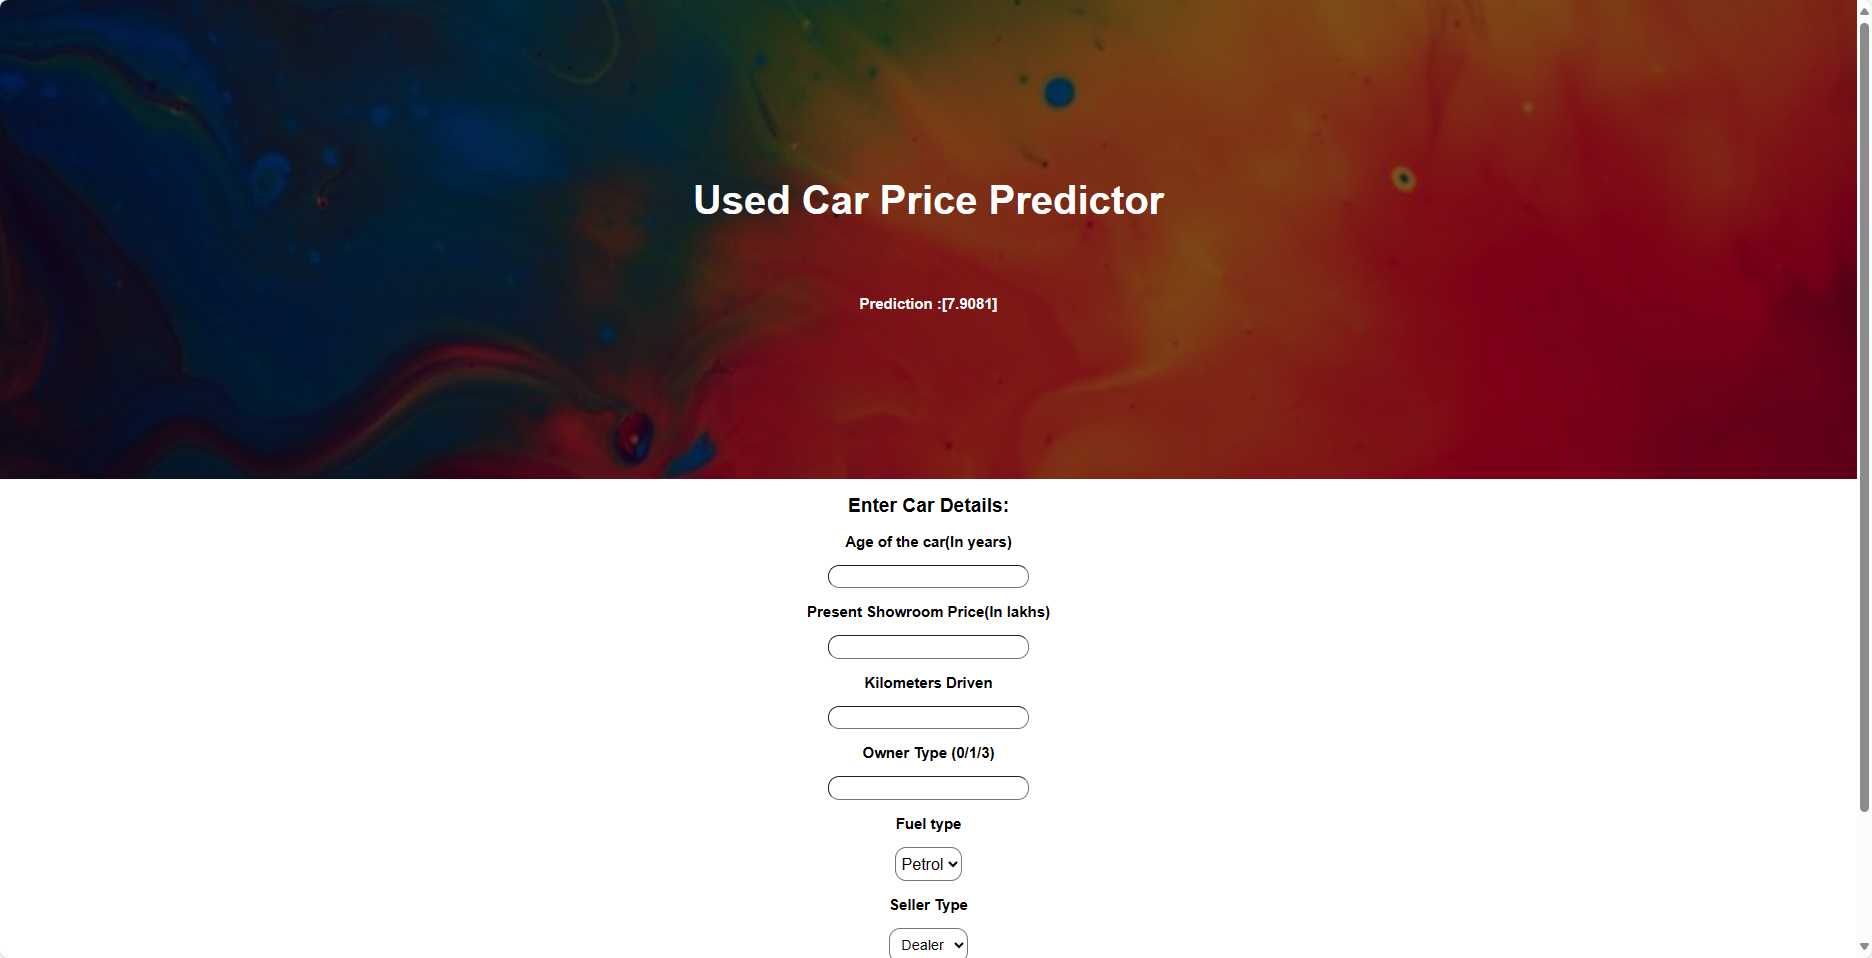

### Happy Learning :)